# 149900 Multi-Layer Perceptron Lab

## Task / Question

1. Load the given dataset into a pandas data frame.
2. Develop a Multi-Layer Perceptron (MLP) model to regress the target variable `y`.
3. Evaluate the model using appropriate metrics.
4. Your MLP model should have at least 3 hidden layers and 1 output layer. You
can use any number of neurons in each layer however, you should be able to
justify your choice.

5. You can use any activation function in the hidden layers however, you should
be able to justify your choice. Remember this is a regression problem hence
referring to the equation `y = mx + c` might help.

## Items to consider:
1. Dataset has 200 features and 1 target variable. Not all features are relevant
for the target variable hence apply feature selection techniques to select the
most relevant features.
2. Use appropriate data pre-processing techniques to prepare the data for the
model.
3. You can use:
    - Pytorch
    - Tensorflow v2
    - Scikit-learn (MLPRegressor)
    - Custom implementation of MLP

# Workflow Summary
Here’s a high-level workflow based on the recommendations:

- Load Data: Use pandas to load the CSV into a DataFrame.
- Preprocess Data:
    - Check for missing values and impute with mean if needed.
    - Standardize features using StandardScaler.
    - Inspect for outliers and handle if necessary.
- Feature Selection:
    - Refine with Lasso regression to further reduce the feature set.
- Build MLP:
    - Use Scikit-learn’s MLPRegressor with three hidden layers (64, 32, 16), ReLU activation, and a linear output layer.
    - Train with MSE loss, Adam optimizer, L2 regularization (alpha=0.01), early stopping, and batch size=4.
- Evaluate Model:
    - Perform 5-fold cross-validation.
    - Report average MSE, RMSE, MAE, and R² across folds.
- Tune and Iterate:
    - If performance is poor, experiment with Tanh activation, adjust the number of features (k), or tune hyperparameters (e.g., alpha, learning rate) using grid search.
- Compare training and validation metrics to diagnose overfitting.

# Justification for Choices
1. Scikit-learn: Simplifies implementation for a small dataset, reducing development time while meeting task requirements.
2. Feature Selection: LassoCV address the high dimensionality, reducing overfitting and improving model interpretability. Also LassoCV allows to test against a range of regularization strengths and completely takes out the weights of insignificant features
3. ReLU Activation: Introduces non-linearity efficiently, suitable for regression tasks, and aligns with the linear output layer (y = mx + c).
4. Architecture (64, 32, 16): Balances capacity with simplicity, appropriate for 20–30 features and 12 samples.
5. Cross-Validation: Maximizes data usage, ensuring reliable evaluation despite the small sample size.
6. Metrics: RMSE and R² provide interpretable insights into prediction error and model fit, respectively.

# Development of the MLP

## Import libraries and data

Command to install all libraries:

`pip install ipykernel pandas numpy matplotlib scikit-learn`

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest, f_regression

In [120]:
df = pd.read_csv('../data/Lab 4 data.csv')
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X192,X193,X194,X195,X196,X197,X198,X199,X200,y
0,-0.105716,-1.056372,0.472175,-0.624175,-1.337268,0.109321,0.293656,0.635470,-0.871020,0.194277,...,0.101041,0.708435,1.343249,-1.202234,-1.333481,-0.888842,0.134859,0.355681,-1.193989,180.621931
1,1.255322,0.125270,0.450023,2.003561,0.277094,0.450579,0.462558,-0.316563,0.052639,0.188200,...,-0.638715,0.407518,1.452270,-1.047522,0.697560,0.335719,-2.483643,0.396654,-1.337587,8.336719
2,0.655216,0.825484,-0.890328,0.105923,-0.627933,1.788487,-0.338370,-0.601686,-0.837622,-0.085283,...,0.108930,1.120339,-0.557336,0.542774,-2.099880,0.766930,-0.640871,0.607291,0.593155,178.514922
3,-0.862742,-0.297754,0.316790,-2.747953,-0.468321,1.168713,-0.639897,0.602207,-0.390683,-0.279624,...,1.174023,-0.597059,-0.768229,-1.508851,-1.563351,0.824011,1.152560,0.288155,0.428682,233.401328
4,-0.492418,0.832162,-0.704394,-0.502445,0.734592,-0.435019,-0.017912,-1.992973,-0.129440,1.429077,...,1.123942,2.143922,2.052964,0.224794,1.871673,-0.728549,-1.876174,-1.169126,1.209643,-98.768226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,1.103675,0.094061,-2.005440,-0.152022,-0.546363,-0.337513,-0.975257,-1.150273,0.613330,0.379767,...,0.326270,-0.676638,-0.559796,0.093592,1.827796,-2.489744,0.908405,1.369683,0.013645,-116.882211
785,-0.171588,-0.849304,-1.352924,-0.168941,-1.962849,0.195300,1.122085,-0.982171,-0.219447,0.657952,...,-0.199860,-1.213542,1.234122,1.079784,-1.450620,0.988462,-0.621944,-0.620922,-0.925772,106.404807
786,-0.505993,-1.760833,0.161300,-0.799373,0.094085,0.403053,0.196873,-1.237710,-0.364094,-0.728414,...,0.757657,-0.405449,-1.441341,1.309643,-1.921436,-0.412136,-0.336068,0.380493,-0.123922,-337.311548
787,-1.493818,-0.974051,0.303531,0.508704,-0.039521,-1.071546,-0.802408,0.399388,0.221141,-0.255489,...,-0.170377,-0.021921,0.714096,-1.469458,-1.132561,0.526706,0.030309,0.113190,-2.408493,113.246348


In [121]:
df.shape

(789, 201)

The dataset has 200 features, 1 target and 789 samples

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Columns: 201 entries, X1 to y
dtypes: float64(201)
memory usage: 1.2 MB


In [123]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X192,X193,X194,X195,X196,X197,X198,X199,X200,y
count,738.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,...,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,-0.009615,-0.031963,0.032946,-0.020330,0.041684,0.028510,-0.000758,0.001225,0.058258,-0.022193,...,0.028202,-0.061797,0.044938,0.052555,-0.031057,0.074345,0.044711,-0.009924,0.025288,12.281021
std,1.009704,0.936040,0.961003,1.001976,1.038156,1.031786,0.982549,0.991376,0.973003,0.996035,...,1.006483,0.984111,1.017546,0.993854,1.030013,1.019402,0.983580,0.998651,0.967129,188.058910
min,-3.216012,-3.820513,-3.176384,-3.002429,-2.850768,-3.577051,-3.199035,-2.895227,-3.112632,-3.053037,...,-3.491013,-3.664873,-3.032483,-3.046992,-2.865725,-3.038443,-2.990723,-2.905864,-3.673076,-559.200944
25%,-0.681337,-0.644846,-0.605959,-0.673322,-0.664937,-0.632421,-0.671990,-0.686229,-0.586130,-0.659275,...,-0.622883,-0.728382,-0.625687,-0.636816,-0.744556,-0.575385,-0.621494,-0.660869,-0.608273,-120.513321
50%,-0.029389,-0.026136,0.003506,-0.044033,0.056595,0.013796,0.013097,0.007928,0.034978,-0.006015,...,-0.005398,-0.099734,0.094558,0.079932,-0.007288,0.048631,0.079058,-0.025447,0.030168,14.637672
75%,0.668454,0.592217,0.643509,0.637678,0.737426,0.696643,0.675089,0.675151,0.694248,0.621763,...,0.667437,0.592130,0.742044,0.731568,0.596348,0.805795,0.733007,0.664038,0.669373,136.900958
max,3.139286,2.946767,3.500256,3.165056,3.354426,3.630078,2.846896,3.606960,3.122353,2.876633,...,2.767763,2.938624,2.960053,3.472683,3.560873,3.065360,2.728651,2.788915,3.845935,647.793655


## Data cleaning and Preprocessing

Check for missing values

In [124]:
print(df.columns[df.isnull().any()])
df.isnull().sum().sum()

Index(['X1'], dtype='object')


np.int64(51)

Column X1 has 51 missing values, since this is less than 5% of the data, I will fill in the colums with the mean

In [125]:
df.fillna(df.mean(), inplace=True)

In [126]:
df.isnull().sum().sum()

np.int64(0)

Checking for duplicate values

In [127]:
df.duplicated().sum()

np.int64(0)

No duplicate columns

Splitting the target and features

In [128]:
X = df.drop(columns=['y'])
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200
0,-0.105716,-1.056372,0.472175,-0.624175,-1.337268,0.109321,0.293656,0.635470,-0.871020,0.194277,...,-0.729022,0.101041,0.708435,1.343249,-1.202234,-1.333481,-0.888842,0.134859,0.355681,-1.193989
1,1.255322,0.125270,0.450023,2.003561,0.277094,0.450579,0.462558,-0.316563,0.052639,0.188200,...,-0.295205,-0.638715,0.407518,1.452270,-1.047522,0.697560,0.335719,-2.483643,0.396654,-1.337587
2,0.655216,0.825484,-0.890328,0.105923,-0.627933,1.788487,-0.338370,-0.601686,-0.837622,-0.085283,...,-0.349969,0.108930,1.120339,-0.557336,0.542774,-2.099880,0.766930,-0.640871,0.607291,0.593155
3,-0.862742,-0.297754,0.316790,-2.747953,-0.468321,1.168713,-0.639897,0.602207,-0.390683,-0.279624,...,0.155884,1.174023,-0.597059,-0.768229,-1.508851,-1.563351,0.824011,1.152560,0.288155,0.428682
4,-0.492418,0.832162,-0.704394,-0.502445,0.734592,-0.435019,-0.017912,-1.992973,-0.129440,1.429077,...,-0.697653,1.123942,2.143922,2.052964,0.224794,1.871673,-0.728549,-1.876174,-1.169126,1.209643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,1.103675,0.094061,-2.005440,-0.152022,-0.546363,-0.337513,-0.975257,-1.150273,0.613330,0.379767,...,0.081384,0.326270,-0.676638,-0.559796,0.093592,1.827796,-2.489744,0.908405,1.369683,0.013645
785,-0.171588,-0.849304,-1.352924,-0.168941,-1.962849,0.195300,1.122085,-0.982171,-0.219447,0.657952,...,0.864976,-0.199860,-1.213542,1.234122,1.079784,-1.450620,0.988462,-0.621944,-0.620922,-0.925772
786,-0.505993,-1.760833,0.161300,-0.799373,0.094085,0.403053,0.196873,-1.237710,-0.364094,-0.728414,...,-0.859650,0.757657,-0.405449,-1.441341,1.309643,-1.921436,-0.412136,-0.336068,0.380493,-0.123922
787,-1.493818,-0.974051,0.303531,0.508704,-0.039521,-1.071546,-0.802408,0.399388,0.221141,-0.255489,...,-1.176930,-0.170377,-0.021921,0.714096,-1.469458,-1.132561,0.526706,0.030309,0.113190,-2.408493


In [129]:
y = df['y']
y

0      180.621931
1        8.336719
2      178.514922
3      233.401328
4      -98.768226
          ...    
784   -116.882211
785    106.404807
786   -337.311548
787    113.246348
788   -386.670956
Name: y, Length: 789, dtype: float64

Scaling the features for better training

In [130]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.09847848, -1.09510137,  0.45734167, ...,  0.0917104 ,
         0.3663306 , -1.26151875],
       [ 1.29622255,  0.16808389,  0.43427688, ..., -2.57219457,
         0.40738548, -1.41009074],
       [ 0.68127417,  0.91661767, -0.96135008, ..., -0.69747019,
         0.61844102,  0.58754041],
       ...,
       [-0.50865511, -1.84817682,  0.13364732, ..., -0.38738219,
         0.39119236, -0.15437929],
       [-1.52091208, -1.00709982,  0.28174357, ..., -0.01465248,
         0.1233585 , -2.51809819],
       [ 1.87372439, -0.36674857,  0.08571566, ...,  1.04328965,
         0.12928964, -1.8215014 ]], shape=(789, 200))

Convert the scaled data back to a dataframe

In [131]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200
0,-0.098478,-1.095101,0.457342,-0.603036,-1.329112,0.078372,0.299833,0.640168,-0.955667,0.217470,...,-0.695129,0.072416,0.783164,1.276733,-1.263349,-1.265275,-0.945455,0.091710,0.366331,-1.261519
1,1.296223,0.168084,0.434277,2.021181,0.226901,0.409326,0.471844,-0.320755,-0.005778,0.211365,...,-0.245240,-0.663042,0.477195,1.383942,-1.107582,0.707834,0.256562,-2.572195,0.407385,-1.410091
2,0.681274,0.916618,-0.961350,0.126084,-0.645415,1.706841,-0.343826,-0.608541,-0.921321,-0.063381,...,-0.302033,0.080260,1.201984,-0.592264,0.493563,-2.009814,0.679834,-0.697470,0.618441,0.587540
3,-0.874228,-0.284133,0.295549,-2.723969,-0.491572,1.105779,-0.650903,0.606595,-0.461690,-0.258619,...,0.222560,1.139163,-0.544249,-0.799651,-1.572058,-1.488588,0.735865,1.127058,0.298671,0.417369
4,-0.494745,0.923757,-0.767748,-0.481469,0.667864,-0.449534,-0.017470,-2.012821,-0.193028,1.457972,...,-0.662598,1.089373,2.242753,1.974651,0.173414,1.848458,-0.788112,-1.954192,-1.161503,1.225386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,1.140824,0.134721,-2.122448,-0.131515,-0.566793,-0.354972,-0.992436,-1.162252,0.570835,0.403816,...,0.145300,0.296336,-0.625164,-0.594683,0.041317,1.805833,-2.516884,0.878670,1.382347,-0.012047
785,-0.165980,-0.873744,-1.443023,-0.148411,-1.932083,0.161755,1.143510,-0.992579,-0.285591,0.683286,...,0.957923,-0.226737,-1.171083,1.169420,1.034236,-1.379073,0.897288,-0.678215,-0.612211,-0.984009
786,-0.508655,-1.848177,0.133647,-0.777999,0.050507,0.363235,0.201268,-1.250504,-0.434346,-0.709481,...,-0.830596,0.725216,-0.349422,-1.461576,1.265664,-1.836460,-0.477525,-0.387382,0.391192,-0.154379
787,-1.520912,-1.007100,0.281744,0.528326,-0.078270,-1.066843,-0.816406,0.401882,0.167509,-0.234373,...,-1.159631,-0.197425,0.040545,0.658037,-1.532396,-1.070086,0.444033,-0.014652,0.123359,-2.518098


Detect outliers after scaling

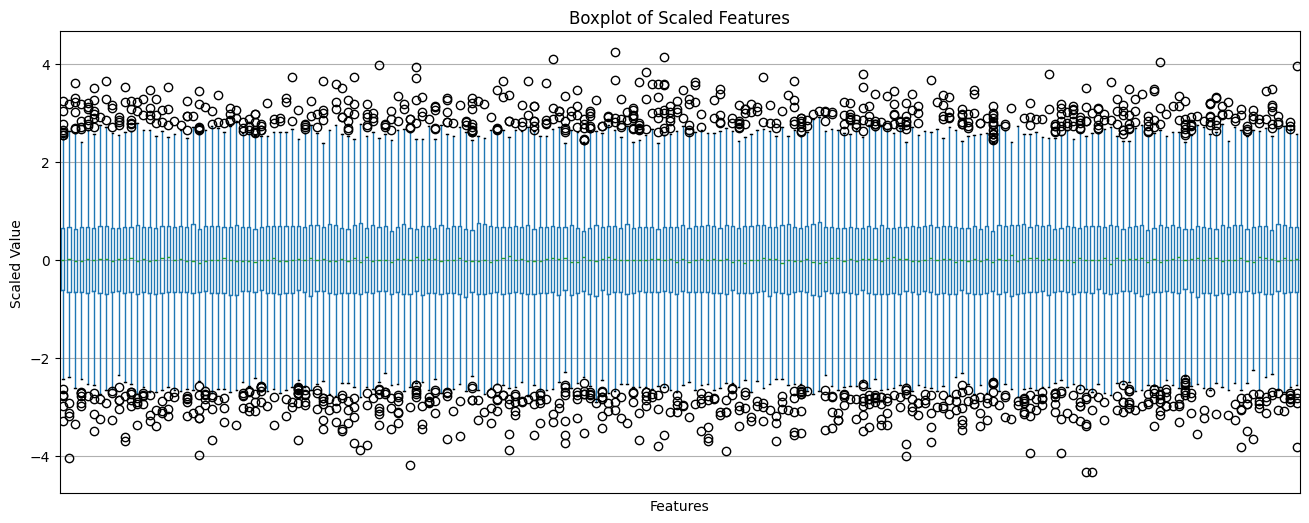

In [132]:
plt.figure(figsize=(16, 6))
X_scaled_df.boxplot()
plt.title('Boxplot of Scaled Features')
plt.xlabel('Features')
plt.ylabel('Scaled Value')
plt.xticks([], [])  # Hide x-axis labels for clarity
plt.show()

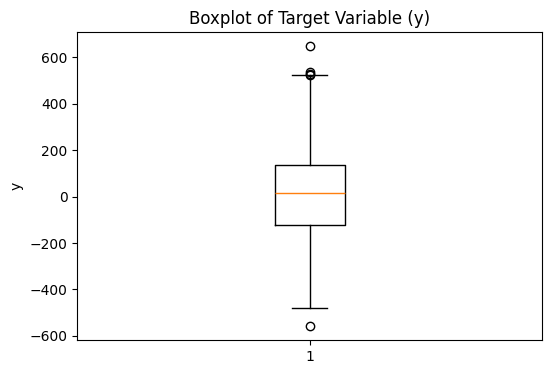

In [133]:
plt.figure(figsize=(6, 4))
plt.boxplot(y)
plt.title('Boxplot of Target Variable (y)')
plt.ylabel('y')
plt.show()


From this we can see some outliers in each feature, so we will remove them as they will affect the accuracy later on

In [134]:
def detect_and_cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    if len(outliers) > 0:
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        return len(outliers)
    return 0

# Check and cap outliers in target variable
y_outliers = detect_and_cap_outliers(df, 'y')

# Check and cap outliers in scaled features
total_feature_outliers = 0
for col in X_scaled_df.columns:
    outliers = detect_and_cap_outliers(X_scaled_df, col)

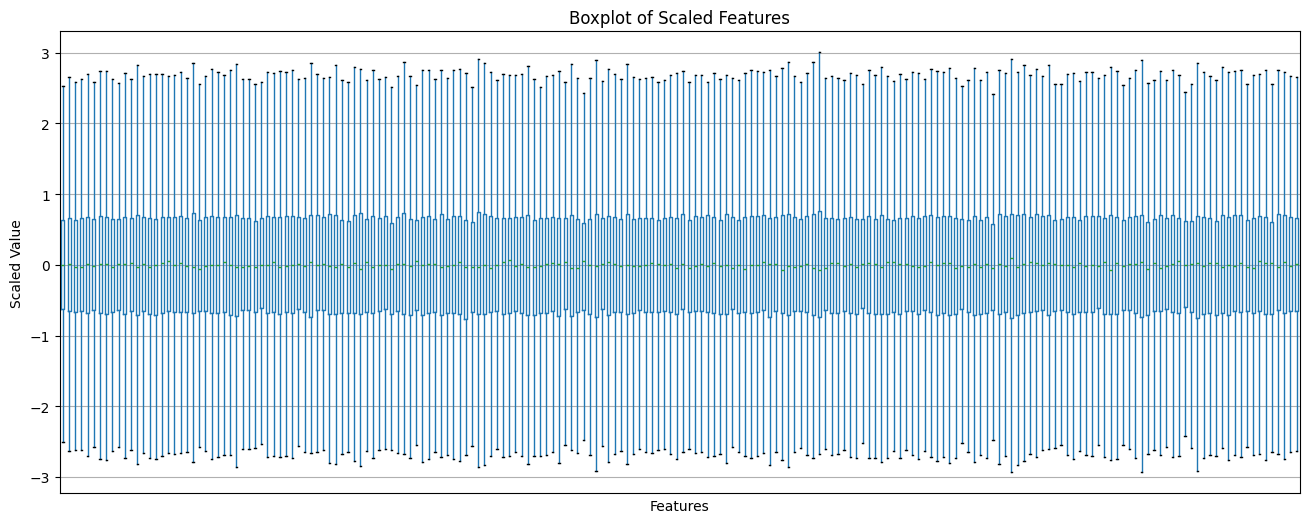

In [135]:
plt.figure(figsize=(16, 6))
X_scaled_df.boxplot()
plt.title('Boxplot of Scaled Features')
plt.xlabel('Features')
plt.ylabel('Scaled Value')
plt.xticks([], [])  # Hide x-axis labels for clarity
plt.show()

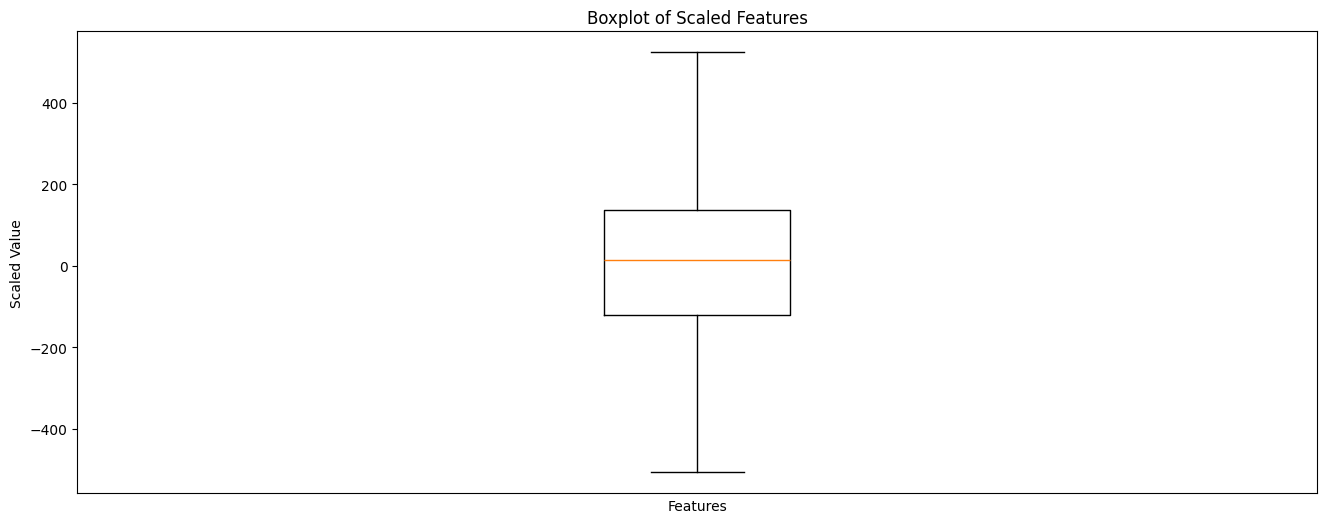

In [136]:
y = df['y']
plt.figure(figsize=(16, 6))
plt.boxplot(y)
plt.title('Boxplot of Scaled Features')
plt.xlabel('Features')
plt.ylabel('Scaled Value')
plt.xticks([], []) 
plt.show()

Now that the outliers have been capped they should not affect the model, and can be handled later implicitly otherwise

In [137]:
X_scaled_df.shape, y.shape

((789, 200), (789,))

Now that we have handled the missing values, outliers and duplicates we can move onto feature selection to reduce the dimensionality

## Feature Selection with LassoCV

Decided to use LassoCV since it can test against multiple regualrization strengths inside a logspace thus faster

In [154]:
alphas = np.logspace(-10, 1, 100)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_scaled_df, y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

LassoCV(alphas=array([1.00000000e-10, 1.29154967e-10, 1.66810054e-10, 2.15443469e-10,
       2.78255940e-10, 3.59381366e-10, 4.64158883e-10, 5.99484250e-10,
       7.74263683e-10, 1.00000000e-09, 1.29154967e-09, 1.66810054e-09,
       2.15443469e-09, 2.78255940e-09, 3.59381366e-09, 4.64158883e-09,
       5.99484250e-09, 7.74263683e-09, 1.00000000e-08, 1.29154967e-08,
       1.66810054e-08, 2.15443469e-0...
       2.78255940e-02, 3.59381366e-02, 4.64158883e-02, 5.99484250e-02,
       7.74263683e-02, 1.00000000e-01, 1.29154967e-01, 1.66810054e-01,
       2.15443469e-01, 2.78255940e-01, 3.59381366e-01, 4.64158883e-01,
       5.99484250e-01, 7.74263683e-01, 1.00000000e+00, 1.29154967e+00,
       1.66810054e+00, 2.15443469e+00, 2.78255940e+00, 3.59381366e+00,
       4.64158883e+00, 5.99484250e+00, 7.74263683e+00, 1.00000000e+01]),
        cv=5, max_iter=10000, random_state=42)

In [155]:
print("Best alpha:", lasso_cv.alpha_)
print("Number of selected features:", np.sum(lasso_cv.coef_ != 0))

selected_features = X.columns[lasso_cv.coef_ != 0]
print("Selected features:", selected_features.tolist())

Best alpha: 0.5994842503189397
Number of selected features: 27
Selected features: ['X1', 'X6', 'X17', 'X20', 'X28', 'X44', 'X52', 'X78', 'X79', 'X89', 'X90', 'X91', 'X99', 'X111', 'X113', 'X129', 'X132', 'X141', 'X144', 'X147', 'X154', 'X161', 'X165', 'X166', 'X181', 'X189', 'X193']


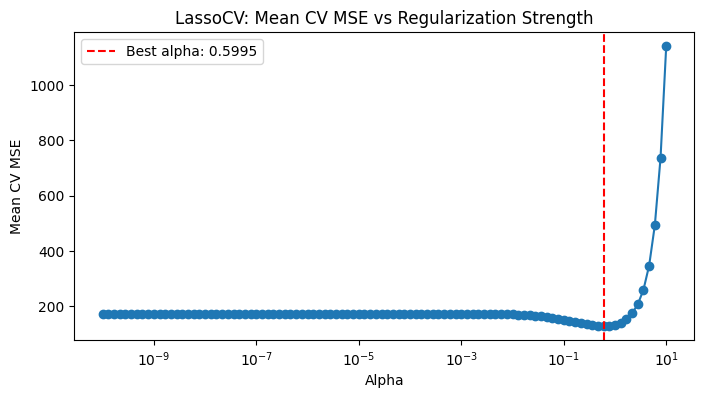

In [156]:
plt.figure(figsize=(8, 4))
plt.semilogx(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1), marker='o')
plt.axvline(lasso_cv.alpha_, color='r', linestyle='--', label=f'Best alpha: {lasso_cv.alpha_:.4f}')
plt.xlabel('Alpha')
plt.ylabel('Mean CV MSE')
plt.title('LassoCV: Mean CV MSE vs Regularization Strength')
plt.legend()
plt.show()